In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# importing the important stuff

In [3]:
# reading the file into df and checking for nans/dropping nans

df = pd.read_csv('police_violence.csv')

np.sum(df.isna())

c:\Users\anita\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


GEOID                      0
city                       0
year                       0
total_police_killings      0
unarmed_police_killings    0
dtype: int64

In [7]:
df.head(10)

,GEOID,city,year,total_police_killings,unarmed_police_killings
0,107000,birmingham city,2014,3,1
1,107000,birmingham city,2015,3,0
2,107000,birmingham city,2016,4,1
3,107000,birmingham city,2017,4,0
4,107000,birmingham city,2018,1,0
5,107000,birmingham city,2019,1,0
6,107000,birmingham city,2020,2,1
7,107000,birmingham city,2021,4,1
8,107000,birmingham city,2022,1,0
9,107000,birmingham city,2023,1,0


**Part 1: Mapping Police Violence Descriptives**

<Axes: xlabel='year'>

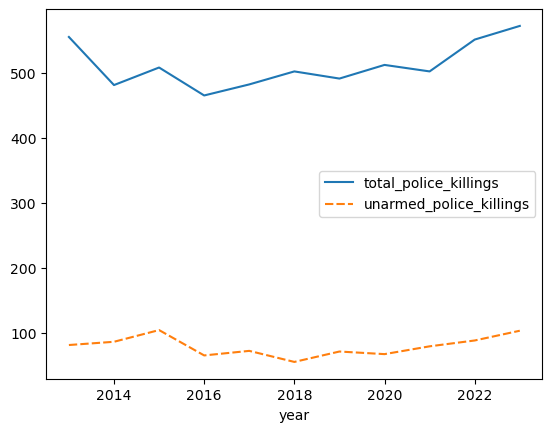

In [24]:
# TASK 1: Create lineplot

# Summing up all police killings across all cities by year

df_allcity = df[['total_police_killings', 'unarmed_police_killings','year']].groupby('year').sum()

# Creating lineplot using seaborn

sns.lineplot(data=df_allcity,
            errorbar=None,
            )


We can see from this visualization that there has been an increase in both total and unarmed police killings that remains relatively steady starting from 2016 and continuing through 2022. The similar shape in the plots indicates that unarmed police killings are not likely motivated by a different factor other than overall police killing rates.

In [42]:
# Task 2: Descriptives

# finding mean, median, and max of all 'total_police_killings' entries

pol_kill_mean = df_allcity['total_police_killings'].mean()

pol_kill_median = df_allcity['total_police_killings'].median()

pol_kill_max = df_allcity['total_police_killings'].max()

print(pol_kill_mean, pol_kill_median, pol_kill_max)

# grouping dataframe as city: total police kills summed over all years

df_kill_by_city = df[['city','total_police_killings']].groupby('city').sum()

# sorting dataframe by number of total killings

df_kill_by_city = df_kill_by_city.sort_values('total_police_killings',
                                              ascending=False)

df_kill_by_city.head()

511.0 502.0 572


,total_police_killings
city,
los angeles city,242
houston city,188
phoenix city,179
new york city,121
chicago city,111



I was a little bit unsure about the wording of this question, so I found the mean, median, and max number of police killings for all the cities aggregated rather by individual city entries (am slightly unsure if you wanted the latter). Across all cities aggregated, the mean number was 511, the median number was 502, and the maximum number was 572. Additionally, for the second half of the question, I interpret the five cities with the most police killings to be the total number of killings summed across all years. The five cities with the highest number of police involved killings in order of most to least are: Los Angeles, Houston, Phoenix, New York, and Chicago.

**Part 2: Police Violence and Demographic Covariates**

In [83]:
# Task 3: What Correlates with Police Violence

# read census covariates into pd dataframe

df_cov = pd.read_csv('census_covariates.csv')

# applying .lower() to city names to prep for dataframe merge with 'df'
df_cov['PLACE'] = df_cov['PLACE'].apply(lambda x: x.lower())

# renaming column 'PLACE' to prep for dataframe merge
df_cov = df_cov.rename(columns={'PLACE': 'city'}, errors='raise')

# MERGING WOOHOO
df_merged = df_cov.merge(df_kill_by_city, on='city')

# Making some new columns (percentage race demos, percentage employed)

race_lst = ['native_american', 'hispanic', 'black', 'white', 'asian', 'aapi', 'multi_race']

for race in race_lst:
    colname = race + '_percent'
    df_merged[colname] = df_merged[race] / df_merged['total_population']

df_merged['employed_percent'] = df_merged['civilian_employed'] / df_merged['total_population']

# making list of numeric variables in df_merged
from pandas.api.types import is_numeric_dtype    
numeric_lst = []

for col in df_merged.columns:
    if is_numeric_dtype(df_merged[col].dtype):
        numeric_lst.append(col)

# calculating correlations

df_merged[numeric_lst].corrwith(df_merged['total_police_killings']).sort_values(ascending=False)

total_police_killings      1.000000
native_american            0.781308
owner_occupied_homes       0.771541
multi_race                 0.753080
hispanic                   0.750833
civilian_employed          0.717464
other_race                 0.715172
vacant_homes               0.711820
civilian_labor_force       0.708823
white                      0.707605
total_homes                0.691296
total_population           0.688752
total_occupied_homes       0.687437
renter_occupied_homes      0.627902
civilian_unemployed        0.621409
black                      0.543267
asian                      0.463355
aapi                       0.391212
gini_index                 0.259579
native_american_percent    0.156248
hispanic_percent           0.097601
black_percent              0.088369
multi_race_percent         0.024993
employed_percent          -0.036353
aapi_percent              -0.043005
median_home_value         -0.043642
asian_percent             -0.079835
white_percent             -0

In [84]:
# Total killings is not a good measure of police violence, this is Task 3 (cont)
# where I calculate correlation based on killing per capita

df_merged['killings_per_capita'] = df_merged['total_police_killings'] / df_merged['total_population']

numeric_lst.append('killings_per_capita')

df_merged[numeric_lst].corrwith(df_merged['killings_per_capita']).sort_values(ascending=False)

killings_per_capita        1.000000
total_police_killings      0.327809
native_american_percent    0.203589
black_percent              0.067957
hispanic_percent           0.066982
aapi_percent               0.063001
native_american            0.032743
aapi                       0.030022
gini_index                 0.019131
multi_race_percent        -0.003803
white_percent             -0.007990
vacant_homes              -0.024164
hispanic                  -0.027127
other_race                -0.033001
multi_race                -0.040805
black                     -0.050687
owner_occupied_homes      -0.051199
total_homes               -0.056589
total_occupied_homes      -0.059087
civilian_unemployed       -0.059175
white                     -0.059608
total_population          -0.060617
renter_occupied_homes     -0.061864
civilian_labor_force      -0.064652
civilian_employed         -0.065134
asian                     -0.111509
employed_percent          -0.166720
median_home_value         -0

When analyzing correlations between total number of police killings for each city and other covariates, some obvious and tautological relationships arise; with more residences ('total_occupied_homes') and larger populations ('total_population') we have positive relationships with total police killings. In my second correlation list, I examine correlations between each covariate and police killing per capita, and using this as a cross reference, we begin to see which relationships are consistent across both measures. For example, in both lists, there is a positive correlation for 'native_american_percent', 'aapi_percent', and 'gini_index'. As expected, 'median_income' has a negative relationship with police killings in both lists. Interestingly, there is a negative relationship between 'killings_per_capita' and 'total_population'.

In [ ]:
# Task 4: Regression

# NOTE: using 'killings_per_capita' as proxy measure for police violence.
# will repeat and interpret using 'total_police_killings', time permitting

# what I think are the best covs

lin_reg = smf.ols(formula = 'killings_per_capita ~ median_income + native_american_percent',
                  data = df_merged).fit()

lin_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     killings_per_capita   R-squared:                       0.111
Model:                             OLS   Adj. R-squared:                  0.105
Method:                  Least Squares   F-statistic:                     19.73
Date:                 Thu, 19 Dec 2024   Prob (F-statistic):           8.39e-09
Time:                         11:55:38   Log-Likelihood:                 2730.7
No. Observations:                  319   AIC:                            -5455.
Df Residuals:                      316   BIC:                            -5444.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 9.76e-05   9.33e-06     10.462      0.000    7.92e-05       0.000
median_income           -5.973e-10    1.2e-10     -4.973      0.000   -8.34e-10   -3.61e-10
native_american_percent     0.0011      0.000      3.982      0.000       0.001       0.002
==============================================================================
Omnibus:                      259.090   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6147.470
Skew:                           3.138   Prob(JB):                         0.00
Kurtosis:                      23.570   Cond. No.                     7.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From my list of covariates, I chose 'median_income', and 'native_american_percent'. These are likely to be correlated with police violence because income is representative of poverty, and poorer regions are more likely to be overpoliced. I used native_american_percent in this model as well because it had a high correlation in both lists in Task 3. Native Americans are more likely to live in poverty than other racial groups, and given the history of genocide and violence perpetrated against Native Americans, it is not surprising that a pattern of police violence persists today. Initially I also included 'employed_percent' in my model as well but I removed it because it was very collinear with 'median_income', understandably, and it only minimally improved my model performance.

**Task 5: Other Data**

Racial demographics and the Gini index are useful and interesting because they provide us with one measure of population diversity over a unit region, which in this case, is a city. However, some of the cities in this dataset are quite large and for some urban cities, such as Chicago, these overall demographic numbers do not represent the segregation in neighborhoods. These large cities also vary greatly in population density, which can dictate the rate of interpersonal interactions.

City population density data can be found here: https://simplemaps.com/data/us-cities (pop density comes free with basic download, but finer grained datasets can be purchased, apparently)

I am also reminded of some work done by Dr. Marc Berman et al. (Psychology Department, MACSS Department at UChicago) where he has this complex machine learning stuff using US Census Data to measure the diversity and segregation of neighborhoods using different indices and calculations. His design also includes an exposure index, which is interesting in the context of population density and interactions. I believe that Berman uses smaller scale neighborhood units from a dataset made by U of Wisconsin: https://www.neighborhoodatlas.medicine.wisc.edu/

While the Stanford Open Policing Project is focused on traffic stops rather than police killings, it provides race and gender information for both the officer and the civilian, which can provide insight into how race dynamics in single interactions can impact policing. It also provides finer grained location detail for the site of the traffic stop. These datasets are also massive in size. Find the data here: https://openpolicing.stanford.edu/data/